In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import sklearn

In [2]:
# Read the German text file
with open("german.txt", "r") as file:
    german_words = file.read().splitlines()

In [3]:
# Read the English text file
with open("english.txt", "r") as file:
    english_words = file.read().splitlines()

In [4]:
# Read the Spanish text file
with open("Spanish.txt", "r") as file:
    spanish_words = file.read().splitlines()

In [5]:
english_words = [word.lower() for word in english_words if len(word) == 5]
german_words = [word.lower() for word in german_words if len(word) == 5]
spanish_words = [word.lower() for word in spanish_words if len(word) == 5]

In [6]:
german_tens = [torch.tensor([ord(char) for char in word]) for word in german_words]
english_tens = [torch.tensor([ord(char) for char in word]) for word in english_words]
spanish_tens = [torch.tensor([ord(char) for char in word]) for word in spanish_words]

In [7]:
from sklearn.model_selection import train_test_split
all_data = german_tens + english_tens + spanish_tens
all_data = torch.stack(all_data)
all_labels = [0] * len(german_words) + [1] * len(english_words) + [2] * len(spanish_words)
# Split into training and testing datasets
train_data, test_data, train_labels, test_labels = train_test_split(
    all_data, all_labels, test_size=0.2, random_state=42)


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier

knn_model = KNeighborsClassifier()
svm_model = svm.SVC()
mlp_nn = MLPClassifier()

knn_model.fit(train_data, train_labels)
svm_model.fit(train_data, train_labels)
mlp_nn.fit(train_data, train_labels)

knn_accuracy = knn_model.score(test_data, test_labels)
svm_accuracy = svm_model.score(test_data, test_labels)
mlp_accuracy = mlp_nn.score(test_data, test_labels)

print("KNN Accuracy:", knn_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("MLP Accuracy:", mlp_accuracy)

KNN Accuracy: 0.6561839943675194
SVM Accuracy: 0.6496127669561136
MLP Accuracy: 0.6467965266369397


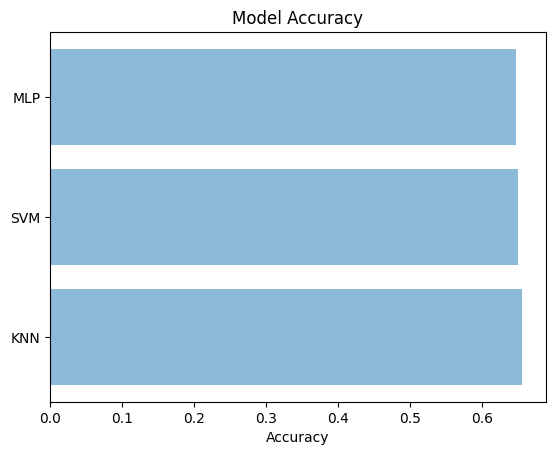

In [10]:
# Graphing the results
import numpy as np
import matplotlib.pyplot as plt

labels = ("KNN", "SVM", "MLP")
accuracies = [knn_accuracy, svm_accuracy, mlp_accuracy]

plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.barh(labels, accuracies, align="center", alpha=0.5)
plt.show()